In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# read data file
data_full = pd.read_csv("bci05.csv")
data_full.describe()

,tag,gx,gy,dbh,pom,date
count,368122.000000,368035.000000,368035.000000,208387.000000,368122.000000,368070.000000
mean,262011.545901,494.356946,254.214007,49.337660,0.696302,8912.050490
std,201947.633329,291.017349,144.039966,83.399585,0.653746,77.962794
min,-42299.000000,0.000000,0.000000,10.000000,0.000000,8768.000000
25%,107171.250000,237.800000,130.300000,16.000000,0.000000,8841.000000
50%,210413.500000,492.200000,254.700000,25.000000,1.000000,8915.000000
75%,409068.750000,747.700000,380.100000,47.000000,1.000000,8975.000000
max,749571.000000,999.900000,499.900000,2765.000000,5.000000,9154.000000


In [3]:
# keep only data for ALIVE species
data_full = data_full[data_full["status"] == 'A']
data = data_full[["sp","gx", "gy"]]
S = data["sp"].nunique()
Species = data["sp"].unique()
print("# species (S) =", S)
print("# alive trees =", data["sp"].count())
print("Species list:", Species)

# species (S) = 299
# alive trees = 208387
Species list: ['ACACME' 'ACALDI' 'ACALMA' 'ADE1TR' 'AEGIPA' 'ALCHCO' 'ALCHLA' 'ALIBED'
 'ALLOPS' 'ALSEBL' 'AMAICO' 'ANACEX' 'ANAXPA' 'ANDIIN' 'ANNOAC' 'ANNOSP'
 'APEIME' 'APEITI' 'APHESI' 'APPUSE' 'ARDIBA' 'ARDIFE' 'ARDIGU' 'ASPICR'
 'AST1ST' 'AST2GR' 'BACTBA' 'BACTC1' 'BACTMA' 'BEILPE' 'BOROPA' 'BROSAL'
 'BROSGU' 'CALOLO' 'CAPPFR' 'CASEAC' 'CASEAR' 'CASECO' 'CASEGU' 'CASESY'
 'CASSEL' 'CAVAPL' 'CECRIN' 'CECRLO' 'CECROB' 'CEDROD' 'CEIBPE' 'CELTSC'
 'CESPMA' 'CESTME' 'CHA1TE' 'CHA2SC' 'CHIMPA' 'CHR1EC' 'CHR2AR' 'CHR2CA'
 'CLIDDE' 'CLIDOC' 'CLIDSE' 'COCCCO' 'COCCMA' 'COLUGL' 'CONOBR' 'CONOCI'
 'CORDAL' 'CORDBI' 'CORDLA' 'COU2CU' 'COUTHE' 'CROTBI' 'CUPACI' 'CUPALA'
 'CUPARU' 'CUPASY' 'CYPHHA' 'DENDAR' 'DES2PA' 'DIO2AR' 'DIPTPA' 'DRYPST'
 'ELAEOL' 'ENTESC' 'ERY1CO' 'ERY2MA' 'ERY2PA' 'EUGECO' 'EUGEGA' 'EUGENE'
 'EUGEOE' 'FARAOC' 'FICUBU' 'FICUC2' 'FICUCI' 'FICUIN' 'FICUMA' 'FICUOB'
 'FICUPO' 'FICUTO' 'FICUTR' 'FICUYO' 'GAR2IN' 'GAR2MA' 'GENIAM' 'GU

In [ ]:
# plot of the species
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
species = labelencoder.fit_transform(data["sp"])
species = species / S
plt.figure(figsize=(20,10))
plt.scatter(data["gx"], data["gy"], c=species, cmap="jet", alpha=.1, marker=".")
plt.xlabel("m", fontsize=16)
plt.ylabel("m", fontsize=16)
plt.tick
plt.show()

TypeError: ticklabel_format() takes 0 positional arguments but 1 was given

In [6]:
# divide the data in 200 subplots
xdiv = [x for x in range(0, 1001, 50)]
ydiv = [x for x in range(0,  501, 50)]

subplot = []
df = pd.DataFrame()

for i in range(len(xdiv)-1):
    for j in range(len(ydiv)-1):
        df = data[data["gx"] >= xdiv[i]  ]
        df =   df[  df["gx"] <  xdiv[i+1]]
        df =   df[  df["gy"] >= ydiv[j]  ]
        df =   df[  df["gy"] <  ydiv[j+1]]
        subplot.append(df)


In [7]:
# the ij element indicates the abundance of species j in subplot i
# rows i    -> subplots
# columns j -> species
abundance_matrix = np.zeros((len(subplot), S))
for i, df in enumerate(subplot):
    for j, p in enumerate(Species):
        n = df[df["sp"] == p].shape[0]
        abundance_matrix[i,j] = n
print(abundance_matrix.shape)
abundance_matrix

(200, 299)


array([[ 0., 25.,  9., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  3.,  0., ...,  0.,  0.,  0.],
       [ 0.,  6.,  0., ...,  2.,  0.,  0.]])

In [8]:
"""average_abundance = matrix.mean(axis=0)
sigma = abuundance_matrix.std(axis=0)
for x,y,z in zip(Species, average_abundance, sigma):
    print(x, y, z)"""

'average_abundance = matrix.mean(axis=0)\nsigma = abuundance_matrix.std(axis=0)\nfor x,y,z in zip(Species, average_abundance, sigma):\n    print(x, y, z)'

In [9]:
presence_matrix = abundance_matrix > 0
average_presence = presence_matrix.mean(axis=0)
'''for x,y in zip(Species, average_presence):
    print(x, y)'''
print(average_presence)


[0.05  0.765 0.08  0.275 0.18  0.515 0.01  0.71  0.34  1.    0.04  0.115
 0.02  0.72  0.72  0.335 0.69  0.17  0.03  0.005 0.01  0.28  0.035 0.67
 0.5   0.215 0.025 0.01  0.07  0.86  0.005 0.945 0.025 0.825 0.985 0.77
 0.37  0.085 0.065 0.44  0.96  0.105 0.79  0.04  0.385 0.045 0.23  0.425
 0.005 0.22  0.03  0.29  0.01  0.565 0.91  0.44  0.08  0.04  0.01  0.43
 0.755 0.005 0.015 0.28  0.345 0.845 0.955 0.93  0.015 0.48  0.045 0.175
 0.265 0.93  0.02  0.305 1.    0.295 0.22  0.78  0.045 0.06  0.305 0.695
 0.405 0.85  0.99  0.855 0.98  1.    0.02  0.035 0.005 0.055 0.04  0.03
 0.015 0.105 0.025 0.035 1.    0.685 0.26  0.52  0.25  0.99  0.95  0.87
 0.245 0.69  0.775 0.3   0.005 0.33  0.785 0.315 0.915 0.865 0.09  1.
 0.33  1.    0.285 0.18  0.24  0.77  0.01  0.735 0.01  0.215 0.12  0.905
 0.025 0.73  0.59  0.095 0.33  0.96  0.62  0.985 0.38  0.095 0.595 0.02
 0.005 0.305 0.445 0.22  0.83  0.005 0.53  0.005 0.19  0.775 0.13  0.975
 0.02  0.01  0.27  0.575 0.76  0.01  0.05  0.155 0.045 0.4  

# Max Ent 1

$$\mathcal{H} = -\sum_{i=1}^S \lambda_i \sigma_i$$

$$ P(\sigma_i) = \frac{1}{Z}e^{\sum_{i=1}^S \lambda_i \sigma_i} $$

$$ Z = \sum_{\{\sigma\}}e^{\sum_{i=1}^S \lambda_i \sigma_i}  $$

$$ \langle \sigma_i \rangle = m_i = \frac{\partial \ln{Z}}{\partial \lambda_i} = \tanh{\lambda_i} \Rightarrow \lambda_i = \tanh^{-1}(m_i) $$

In [10]:
m = 2*average_presence-1
lambda_MaxEnt1 = np.arctanh(m)
print(lambda_MaxEnt1)

[-1.47221949  0.59014516 -1.22117352 -0.48470028 -0.75817374  0.030009
 -2.29755993  0.44769202 -0.33164711         inf -1.58902692 -1.02032776
 -1.94591015  0.4722308   0.4722308  -0.34282825  0.40005965 -0.79281363
 -1.73804934 -2.64665241 -2.29755993 -0.4722308  -1.65839002  0.35409253
  0.         -0.64752284 -1.83178082 -2.29755993 -1.29334467  0.90764498
 -2.64665241  1.42192587 -1.83178082  0.77529871  2.09229572  0.6041556
 -0.26610841 -1.1881364  -1.33307963 -0.12058103  1.58902692 -1.07143168
  0.66246271 -1.58902692 -0.23418947 -1.52752443 -0.6041556  -0.15114044
 -2.64665241 -0.63283319 -1.73804934 -0.44769202 -2.29755993  0.13073985
  1.15681746 -0.12058103 -1.22117352 -1.58902692 -2.29755993 -0.14092558
  0.56272977 -2.64665241 -2.09229572 -0.4722308  -0.32054541  0.84795576
  1.52752443  1.29334467 -2.09229572 -0.04002135 -1.52752443 -0.77529871
 -0.51007034  1.29334467 -1.94591015 -0.41180003         inf -0.43561122
 -0.63283319  0.63283319 -1.52752443 -1.37576766 -0.41

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in arctanh
  


In [11]:
# check if I get the same results if I use a Ising model like matrix
# (+1 -> presence, -1 -> absence), instead of doing the analisys
# and then appling the condotion: m = 2*average_presence-1
presence_matrix_Ising = presence_matrix.copy()
presence_matrix_Ising = presence_matrix_Ising.astype(int)
presence_matrix_Ising[presence_matrix_Ising == 0] = -1

average_presence_Ising = presence_matrix_Ising.mean(axis=0)

lambda_MaxEnt1_Ising = np.arctanh(average_presence_Ising)
np.allclose(lambda_MaxEnt1_Ising, lambda_MaxEnt1)

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in arctanh
  # Remove the CWD from sys.path while we load stuff.


True

In [12]:
def H1(Lambda, configuration):
    sigma = configuration.mean(axis=0)
    return -np.dot(Lambda, sigma)
H1(lambda_MaxEnt1_Ising, presence_matrix_Ising)

-inf

# Max Ent 2

$$\mathcal{H} = -\sum_{j=1}^S \lambda_j \sigma_j - \frac{k}{S}(\sum_{j=1}^S \sigma_j)^2$$

Constraints:

1. $(1-m_i)/2 = p_i \Rightarrow$ Ising-like presence matrix
2. $\langle(\sum_{j=1}^S \sigma_j)^2\rangle_{emp} = \langle(S_+ - S_-)^2\rangle_{emp}$

In [13]:
constr1_data = average_presence_Ising.copy()
constr2_data = np.mean((presence_matrix_Ising.sum(axis=1))**2)/S
print(constr2_data)

21.32829431438127


In [14]:
def H2(Lambda, k, configuration):
    first_sum  = np.dot(Lambda, configuration)
    second_sum = (k/configuration.shape[0])*(np.sum(configuration))**2
    
    return(-first_sum - second_sum)

In [15]:
np.random.seed(20190324)

def Metropolis(Lambda,k,n_steps=10000, beta=1, species=299, verbose=False):
    config = np.random.choice([-1,1], species)
    # list to save the configurations
    Configuration = [config]
    # list to save the energies
    Energy = [H2(Lambda, k, config)]
    for i in range(n_steps):
        # save initial configuration
        config_init = config.copy()
        # Calculate the energy of the initial configuration
        E_init = H2(Lambda, k, config_init)
        
        # change one element at random in the configuration
        config_final = config_init.copy()
        config_final[np.random.randint(0, species)] *= -1
        
        # Calculate the energy of the final configuration
        E_final = H2(Lambda, k, config_final)
                
        # if E_final < E_init always accept the new configuration
        # if E_final > E_init accept the new configuration with probability = exp[-beta(E_final-E_init)]
        threshold = np.exp(beta*(E_init-E_final)) #     threshold > 1 if E_final < E_init
                                                  # 0 < threshold < 1 if E_final > E_init
        # get random number in [0,1] and accept the configuration if it's lower than the threshold
        if np.random.rand() < threshold:
            config = config_final.copy()
            Configuration.append(config)
            Energy.append(E_final)
            if verbose: print("Accepted with prob", np.minimum(threshold, 1))
        else:
            config = config_init.copy()
            Configuration.append(config)
            Energy.append(E_init)
            if verbose: print("Rejected with prob", 1-threshold)
                
    return Configuration, Energy

Config: 10001
En: 10001


Text(0, 0.5, 'Energy')

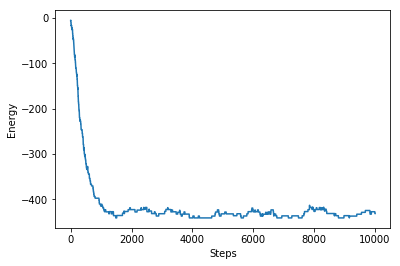

In [16]:
l = np.random.rand(len(lambda_MaxEnt1_Ising))
Config, En = Metropolis(l, k=1, n_steps=10000, beta=1)
print("Config:", len(Config))
print("En:", len(En))
plt.plot(En)
plt.xlabel("Steps")
plt.ylabel("Energy")


In [17]:
Config[-1]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [18]:
'''def ModelUpdate(data_config, model_config, Lambda, k, eta=1):
    data_constr1  = data_config.mean(axis=0)
    model_constr1 = data_config.mean(axis=0)
    new_Lambda  = Lambda + eta*(data_constr1 - model_constr1)
    data_constr2  = (((data_config  > 0).sum(axis = 1) - (data_config  < 0).sum(axis = 1))**2).mean()
    model_constr2 = (((model_config > 0).sum(axis = 1) - (model_config < 0).sum(axis = 1))**2).mean()
    new_k = k + eta*(data_constr2 - model_constr2)
    return new_Lambda, k'''

'def ModelUpdate(data_config, model_config, Lambda, k, eta=1):\n    data_constr1  = data_config.mean(axis=0)\n    model_constr1 = data_config.mean(axis=0)\n    new_Lambda  = Lambda + eta*(data_constr1 - model_constr1)\n    data_constr2  = (((data_config  > 0).sum(axis = 1) - (data_config  < 0).sum(axis = 1))**2).mean()\n    model_constr2 = (((model_config > 0).sum(axis = 1) - (model_config < 0).sum(axis = 1))**2).mean()\n    new_k = k + eta*(data_constr2 - model_constr2)\n    return new_Lambda, k'

In [19]:
def param_from_Metropolis(Configurations, discard_rate=.75):
    Config  = np.array(Configurations) 
    Config_ = Config[int(discard_rate*Config.shape[0]):,:] # use only the last configurations
    constr1 = Config_.mean(axis=0)
    constr2 = np.mean((Config_.sum(axis=1))**2)/Config_.shape[1]
    return constr1, constr2

In [20]:
#param_from_Metropolis(Config)


In [21]:
Lambda = (np.random.rand(len(lambda_MaxEnt1_Ising))-0.5)*6
k = 1.1
n_iter = 10000
eta = 1e-03
Lambda_list = [Lambda]
k_list = [k]
constr1_diff = []
constr2_diff = []
for t in range(n_iter):
    # generate random configurations (Metropolis)
    Config, En = Metropolis(Lambda, k, n_steps=1000, beta=1)
    # get constraints from Metropolis configurations
    constr1_model, constr2_model = param_from_Metropolis(Config)
    # update parameters
    diff1 = constr1_data - constr1_model
    diff2 = constr2_data - constr2_model
    Lambda += eta*diff1
    k      += eta*diff2
    Lambda_list.append(Lambda.copy())
    k_list.append(k)
    constr1_diff.append(diff1)
    constr2_diff.append(diff2)
    if (t+1)%1000==0: 
        print("Iteration {:d}/{:d}".format(t+1, n_iter))

Iteration 1000/10000
Iteration 2000/10000
Iteration 3000/10000
Iteration 4000/10000
Iteration 5000/10000
Iteration 6000/10000
Iteration 7000/10000
Iteration 8000/10000
Iteration 9000/10000
Iteration 10000/10000


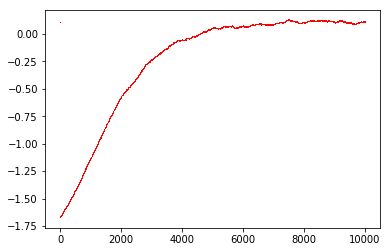

In [22]:
for i,l in enumerate(Lambda_list):
    plt.plot(i, l[179], "r,")
plt.show()

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(-5, 5)

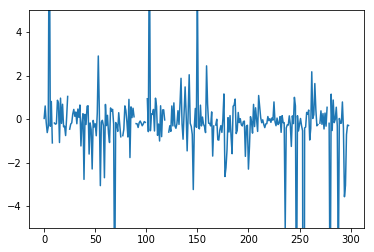

In [23]:
lambda_MaxEnt2_Ising = Lambda_list[-1].copy()
plt.plot((lambda_MaxEnt2_Ising-lambda_MaxEnt1_Ising)/lambda_MaxEnt1_Ising)
plt.ylim(-5,5)

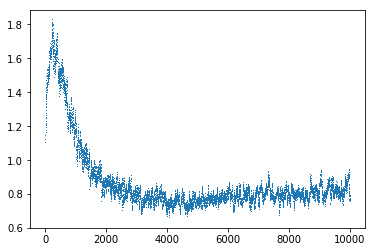

In [24]:
k_MaxEnt2_Ising = k_list[-1]
plt.plot(k_list, ",")

In [25]:
print("k =", k_MaxEnt2_Ising)
print("lambda =\n", lambda_MaxEnt2_Ising)

k = 0.7717210355900834
lambda =
 [-1.51655046e+00  9.45697194e-01 -1.03174198e+00 -1.83887243e-01
 -4.84222914e-01  3.49960701e-01 -1.54423054e+00  8.10752365e-01
  3.19491821e-02  2.19509395e+00 -1.30045784e+00 -7.82166158e-01
 -1.53932584e+00  8.80966976e-01  8.20198583e-01  2.66682945e-02
  7.85288390e-01 -6.35314676e-01 -2.92268649e+00 -1.69985833e+00
 -1.54798700e+00 -1.14584735e-01 -1.79177296e+00  7.22593608e-01
  3.63567291e-01 -3.47470897e-01 -1.41009215e+00 -1.89673484e+00
 -1.59997215e+00  1.31069010e+00 -2.99078950e+00  1.88503646e+00
 -1.43954278e+00  1.13263837e+00  2.25503332e+00  9.94817501e-01
  6.27603043e-02 -9.95349953e-01 -1.66091360e+00  2.13659566e-01
  1.93254271e+00 -8.05443231e-01  1.05279717e+00 -2.56492497e+00
  1.42477501e-01 -1.25674837e+00 -3.18351292e-01  1.95716488e-01
 -2.48678288e+00 -4.04768195e-01 -1.36166221e+00 -1.04705366e-01
 -2.92955496e+00  5.10098171e-01  1.64279496e+00  2.48481858e-01
 -1.05329884e+00 -1.49848248e+00 -1.60596960e+00  2.39110

# Max Ent 3

In [26]:
average_abundance = abundance_matrix.mean(axis=0)
std_abundance     = abundance_matrix.std(axis=0)
sel = average_abundance-std_abundance > 0
selection = abundance_matrix.copy()
selection = selection[:,sel]
cov = np.cov(selection, rowvar=False)
M = np.linalg.inv(cov)
M_zero_diag = M.copy()
np.fill_diagonal(M_zero_diag, 0)


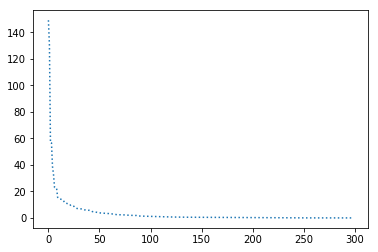

In [27]:
plt.plot(np.flip(np.sort(average_abundance)), ":")

-0.09312026178109133 1.0970152032953804


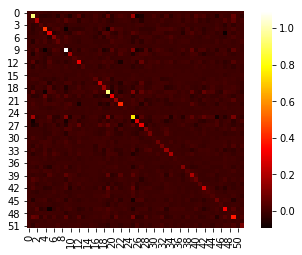

In [28]:
import seaborn as sns
sns.heatmap(M, cmap="hot", square=True)
print(M.min(), M.max())

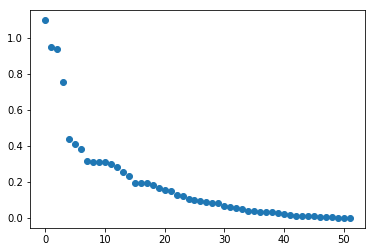

In [29]:
diag = M.diagonal()
diag = np.flip(np.sort(diag))
plt.plot(diag, "o")

(-0.2, 0.2)

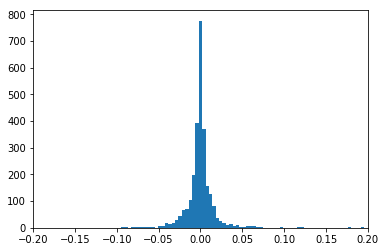

In [30]:
plt.hist(M.reshape(M.shape[0]*M.shape[1],1), bins=np.linspace(-.2,.2,100))
plt.xlim(-.2,.2)

-0.09312026178109133 0.1759950424960202


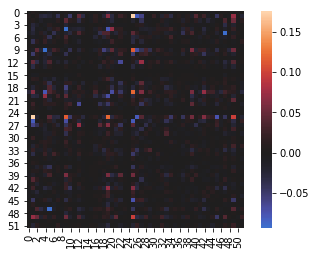

In [31]:
import seaborn as sns
sns.heatmap(M_zero_diag, square=True, center=0)
print(M_zero_diag.min(), M_zero_diag.max())

(-0.1, 0.1)

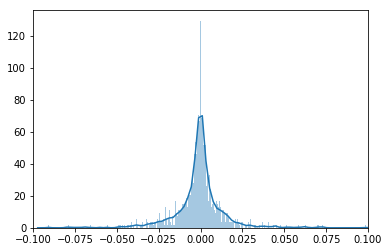

In [32]:
sns.distplot(M_zero_diag.reshape(M_zero_diag.shape[0]*M_zero_diag.shape[1],1), bins=np.linspace(-.1,.1,500))
plt.xlim(-.1,.1)

In [33]:
lambda_MaxEnt3 = -np.dot(M, average_abundance[sel])
lambda_MaxEnt3

array([-4.83264797e-02, -1.16486070e+00, -2.93478529e-01, -3.11328000e-01,
       -3.66855711e-01, -1.07044286e-01, -3.01679453e-01, -1.63703924e-01,
       -1.73817090e-01, -9.70142202e-01,  3.49753298e-01,  3.54322694e-01,
       -6.89061916e-01,  4.13549615e-01, -1.03968491e-01, -3.21059683e-01,
       -5.60400020e-01, -8.49591230e-01, -5.25008504e-01, -1.12937430e+00,
       -6.70060527e-01, -5.33879178e-01, -2.37290542e-01, -2.87360127e-01,
       -4.33141090e-02, -1.96174052e+00,  3.47173808e-01, -4.27117072e-01,
        3.78209328e-01,  1.44537751e-01, -3.08590561e-01, -1.47285523e+00,
       -1.36667803e-03, -2.92927106e-02, -9.75952730e-01,  1.03818094e-01,
       -2.63891799e-01,  6.35529827e-02, -3.14243271e-01,  8.30471696e-02,
        2.37977688e-01, -5.95514036e-02, -3.67265304e-01, -3.19391612e-01,
       -4.46038392e-01, -4.19277073e-01, -2.19594166e-02, -4.22997646e-01,
       -1.44019814e-01, -1.06379959e+00, -1.43674020e-02, -1.91712012e-01])

# Graph

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


1

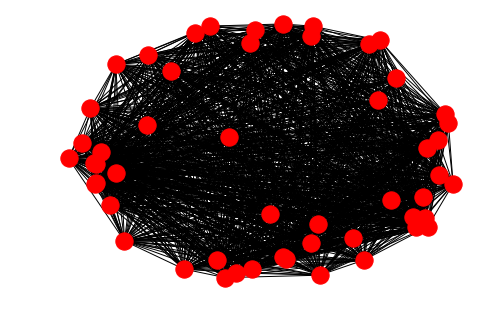

In [34]:
import networkx as nx
g = nx.from_numpy_matrix(M)
nx.draw(g)
nx.number_connected_components(g)

In [35]:
Theta = np.linspace(M.min(), .4, 100)
theta_star, idx = None, None
n_comp = []
index = 0
for index, theta in enumerate(Theta):
    Mt = M_zero_diag.copy()
    Mt[Mt < theta] = 0
    g = nx.from_numpy_matrix(Mt)
    '''if index<10: 
        nx.draw_networkx(g)
        plt.show()'''
    n_comp.append(nx.number_connected_components(g))
    index+=1
    if theta_star == None and nx.is_connected(g)==False: 
        theta_star = Theta[index-1]
        idx = index-1
theta_star

0.006499993124179648

Text(0.5, 0, '$\\theta$')

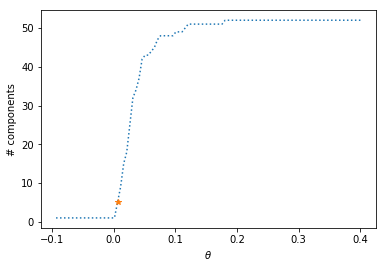

In [38]:
plt.plot(Theta, n_comp, ":")
plt.plot(theta_star, n_comp[idx], "*")
plt.ylabel("# components")
plt.xlabel("$\\theta$")
